# Import Necessary Libraries

In [40]:
from datetime import datetime
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.stats import pearsonr
import scipy as sp
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn import linear_model
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from scipy.stats import shapiro
from scipy.stats import normaltest
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from scipy import stats
plt.style.use('seaborn')
%matplotlib inline
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)

## Read in Data to DataFrame

In [4]:
df = pd.read_csv('vehicles.csv')

In [5]:
df.drop(columns=['id', 'county', 'url', 'region_url', 'image_url', 'description', 'vin', 'region', 'model', 'lat', 'long'], inplace=True)

In [6]:
df = df[df['price'] > 500]
df = df[df['price'] < 5000000]

In [7]:
df = df[df['odometer'] < 400000 ]

In [8]:
df.dropna(subset = ['manufacturer'], inplace = True)

In [9]:
df.dropna(subset = ['condition'], inplace = True)

In [10]:
df.dropna(subset=['size'], inplace = True)

In [11]:
df.dropna(subset = ['odometer'], inplace = True)

In [12]:
df.dropna(subset = ['fuel'], inplace = True)

In [13]:
title_dict = {'clean':1, 'rebuilt':1, 'salvage':0, 'lien':0, 'missing':0, 'parts only':0}
df['title_status'].replace(title_dict, inplace = True)

In [14]:
condition_dict = {'excellent':'good', 'new':'good', 'good':'ok', 'like new':'ok', 'fair':'poor', 'salvage':np.nan}
df.condition.replace(condition_dict, inplace = True)
df.dropna(subset = ['condition'], inplace = True)

In [15]:
cylinder_dict = {'12 cylinders':10, '10 cylinders':10, '8 cylinders':8, '6 cylinders':6, '5 cylinders':5, '4 cylinders':4, '3 cylinders':3, 'other':np.nan}
df.cylinders.replace(cylinder_dict, inplace = True)
df.dropna(subset = ['cylinders'], inplace = True)

In [16]:
manufact_dict1 = {'ford': 1, 'chevrolet':1, 'toyota':3, 'honda':3, 'nissan':3, 'gmc':1, 'ram':1, 'jeep':1,
       'dodge':1, 'bmw':2, 'volkswagen':2, 'hyundai':3, 'subaru':1, 'mercedes-benz':2,
       'chrysler':1, 'kia':3, 'cadillac':1, 'lexus':3, 'buick':1, 'mazda':3, 'audi':2,
       'pontiac':1, 'acura':3, 'lincoln':1, 'infiniti':3, 'volvo':2, 'mitsubishi':3,
       'mercury':1, 'mini':2, 'saturn':1, 'rover':2, 'jaguar':2, 'fiat':2, 'alfa-romeo':2,
       'harley-davidson':np.nan, 'datsun':2, 'land rover':2, 'ferrari':2, 'porche':2,
       'aston-martin':2, 'morgan':2, 'tesla':1, 'hennessey':np.nan}
df.manufacturer.replace(manufact_dict1, inplace = True)
df.dropna(subset = ['manufacturer'], inplace = True)
manufact_dict2 = {1:'usa', 2:'euro', 3:'asia'}
df.manufacturer.replace(manufact_dict2, inplace = True)

In [17]:
state_dict = {'ca':1, 'fl':1, 'ny':1, 'tx':1, 'mi':1, 'wi':1, 'oh':1, 'nc':1, 'pa':1, 'or':1, 'va':1, 'mn':1,
       'tn':0, 'co':0, 'ma':1, 'ia':0, 'il':1, 'in':1, 'al':1, 'nj':1, 'az':0, 'ky':0, 'sc':1, 'ks':0,
       'mo':0, 'ok':0, 'id':0, 'mt':0, 'ga':1, 'ct':1, 'vt':0, 'ar':0, 'wa':1, 'nm':0, 'md':1, 'la':1,
       'nh':1, 'ms':1, 'ri':1, 'ak':1, 'me':1, 'dc':1, 'nv':0, 'sd':0, 'hi':1, 'ne':0, 'de':1, 'nd':0,
       'wv':0, 'ut':0, 'wy':0} 
df.state.replace(state_dict, inplace = True)
df.dropna(subset = ['state'], inplace = True)
df['coast'] = df['state']
df.drop(columns = ['state'], inplace = True)

In [18]:
color_dict={'white':1, 'black':1, 'silver':1, 'grey':1, 'blue':1, 'red':1, 'green':1, 'brown':1,
       'custom':0, 'yellow':0, 'orange':0, 'purple':0}
df.paint_color.replace(color_dict, inplace = True)
df.dropna(subset = ['paint_color'], inplace = True)

In [19]:
transmission_dict = {'automatic':1, 'other':1, 'manual':0}
df.transmission.replace(transmission_dict, inplace = True)
df.dropna(subset = ['transmission'], inplace = True)

In [20]:
drive_dict = {'4wd':1, 'fwd':0, 'rwd':0}
df.drive.replace(drive_dict, inplace = True)
df.dropna(subset = ['drive'], inplace = True)

In [21]:
type_dict = {'SUV':'suv', 'sedan':'car', 'truck':'truck', 'pickup':'truck', 'coupe':'car', 'van':'van', 'hatchback':'car',
       'mini-van':'van', 'convertible':'car', 'wagon':'car', 'other':np.nan, 'offroad':'suv', 'bus':'van'}
df.type.replace(type_dict, inplace = True)
df.dropna(subset = ['type'], inplace = True)

In [22]:
fuel_dict = {'hybrid':'other', 'electric':'other'}
df.fuel.replace(fuel_dict, inplace = True)

In [23]:
df.dropna(inplace = True)

In [24]:
df.shape

(99577, 14)

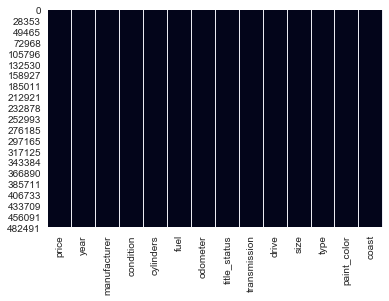

In [25]:
sns.heatmap(df.isnull(), cbar = False)

In [26]:
df['price'] = [float(i) for i in df['price']]

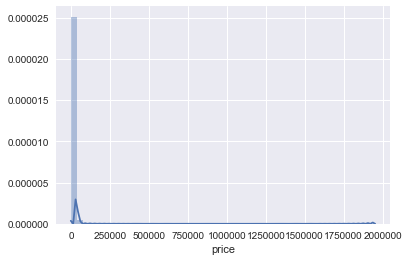

In [27]:
sns.distplot(df.price)

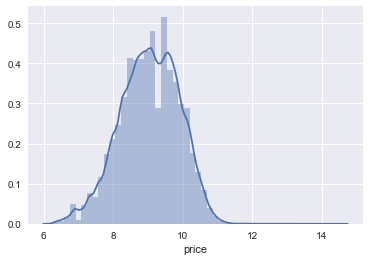

In [28]:
sns.distplot(np.log(df.price))

In [29]:
df['log_price'] = np.log(df.price)

In [30]:
df['age'] = 2020 - df['year']

In [31]:
df.shape

(99577, 16)

In [32]:
df.reset_index(inplace=True)

In [33]:
df.drop(columns = ['index', 'year'], inplace = True)

## EDA

### Q1: Which continent's cars are most expensive on average?

#### one way ANOVA test

In [34]:
df.groupby('manufacturer')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
manufacturer,,,,,,,,
asia,27272.0,9084.493070,9159.178968,550.0,4200.0,6995.0,11900.0,690000.0
euro,9827.0,10890.900784,14806.059330,550.0,4987.0,8000.0,13900.0,1000000.0
usa,62478.0,13184.102836,14366.957591,522.0,4998.0,9995.0,17995.0,1950000.0


In [ ]:
# H0: price at different continents are the same   Ha: price at different continents are different

In [88]:
asia = df.loc[df['manufacturer'] == 'asia']

In [37]:
euro = df.loc[df['manufacturer'] == "euro"]

In [38]:
usa = df.loc[df['manufacturer'] == "usa"]

In [85]:
stats.f_oneway(asia['price'], euro['price'], usa['price'])

F_onewayResult(statistic=944.1687008794038, pvalue=0.0)

In [ ]:
# p_value < 0.05 --> reject H0

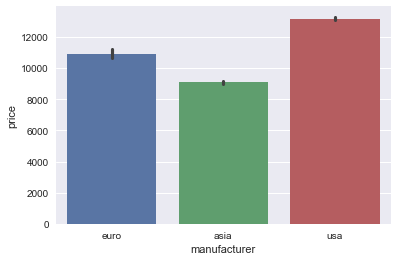

In [33]:
sns.barplot(y=df.price, x=df['manufacturer'])

In [43]:
coast_dict = {0:'State without coast', 1: 'State with coast'}
df.coast.replace(coast_dict, inplace = True)
df.dropna(subset = ['coast'], inplace = True)

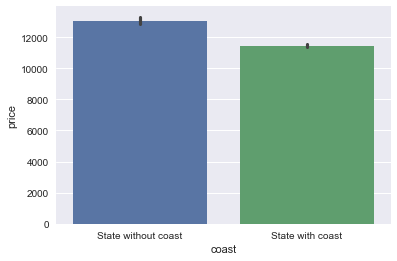

In [44]:
sns.barplot(y=df.price, x=df['coast'])

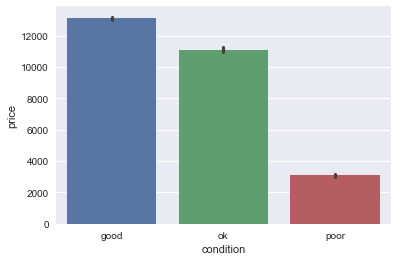

In [35]:
sns.barplot(y=df.price, x=df['condition'])

### Q2: Does higher cylinder count lead to higher price?

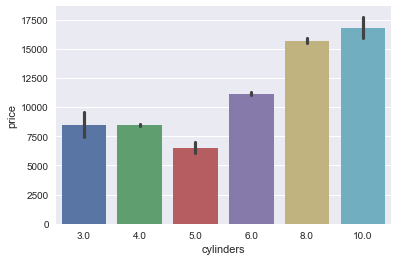

In [36]:
sns.barplot(y=df.price, x=df['cylinders'])

In [129]:
# H0: cylinder amount doesn't affect price   Ha: cylinder amount does affect price 

In [101]:
cylindergroup = {3.0:'less', 4.0: 'less', 5.0: 'less', 6.0: 'more', 8.0: 'more', 10.0: 'more'}
df.cylinders.replace(cylindergroup, inplace = True)
df.dropna(subset = ['cylinders'], inplace = True)

In [103]:
df['cylinders'].value_counts()

more    68829
less    30748
Name: cylinders, dtype: int64

In [105]:
cylindergroup_price = df.groupby('cylinders')['price'].describe()
cylindergroup_price

,count,mean,std,min,25%,50%,75%,max
cylinders,,,,,,,,
less,30748.0,8381.307435,8331.895593,549.0,4000.0,6987.0,10998.0,1000000.0
more,68829.0,13377.865624,14763.291676,522.0,5000.0,9995.0,18500.0,1950000.0


In [106]:
less_df =  df.loc[df['cylinders'] == 'less']
std1=less_df['price'].std()

In [107]:
more_df =  df.loc[df['cylinders'] == 'more']
std2=more_df['price'].std()

In [126]:
sp=((((len(less_df)-1)*std1**2)+((len(more_df)-1)*std2**2))/(len(less_df)+len(more_df)-2))**(1/2)
t_star = (less_df['price'].mean()-more_df['price'].mean())/(sp*(((1/len(less_df))+(1/len(more_df)))**(1/2)))
t_star

-55.527453829295574

In [128]:
# t = -55.527453829295574 , df = 99575, p-value = 0.000 -->reject H0

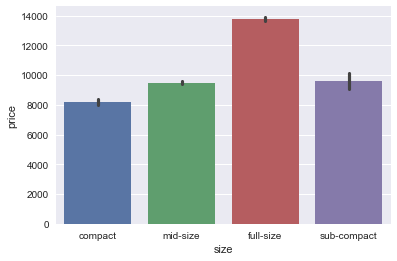

In [37]:
sns.barplot(y=df.price, x=df['size'])

### Q3: How old, on average, is a car when posted for sale in secondary markets?

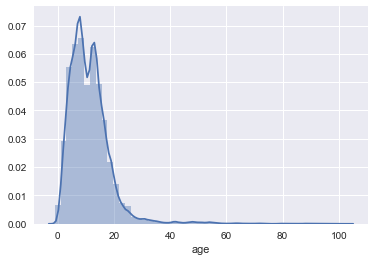

In [38]:
sns.distplot(df['age'])

In [42]:
df['age'].describe()

count    99577.000000
mean        11.377597
std          7.602129
min         -1.000000
25%          6.000000
50%         10.000000
75%         15.000000
max        103.000000
Name: age, dtype: float64

In [48]:
n = len(df['age'])
dr_mean = df['age'].mean()
dr_std = df['age'].std()
t_value_dr = stats.t.ppf(0.975, n-1)
margin_error_dr = t_value_dr*dr_std/(n**0.5)
conf_int_dr = (dr_mean - margin_error_dr, dr_mean + margin_error_dr)
conf_int_dr

(11.330379074369853, 11.424815398249327)

In [130]:
# graphic and sentence 
"""We can say with 95% confidence that a similar sample will have a mean number of age between 11.33 and 11.42 years."""

'We can say with 95% confidence that a similar sample will have a mean number of age between 11.33 and 11.42 years.'

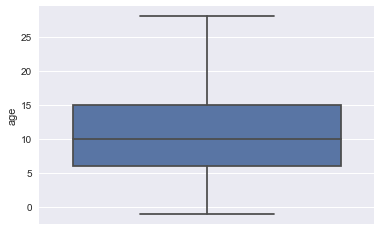

In [57]:
sns.boxplot(y=df['age'],showfliers=False)

In [44]:
log_age_array = np.log(df[df['age'] > 0]['age'])
log_age_array

0        2.079442
1        2.484907
2        2.772589
3        2.772589
4        1.609438
           ...   
99572    2.079442
99573    2.484907
99574    1.791759
99575    0.693147
99576    1.386294
Name: age, Length: 99494, dtype: float64

Text(0, 0.5, 'frequency')

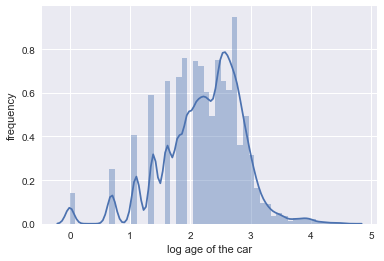

In [45]:
sns.distplot(log_age_array)
plt.xlabel('log age of the car')
plt.ylabel('frequency')

In [72]:
dummies_df.columns = ['price', 'odometer', 'title_status', 'transmission', 'drive',
       'paint_color', 'coast', 'log_price', 'age', 'manufacturer_euro',
       'manufacturer_usa', 'condition_ok', 'condition_poor', 'cylinders_4',
       'cylinders_5', 'cylinders_6', 'cylinders_8', 'cylinders_10',
       'fuel_gas', 'fuel_other', 'size_full_size', 'size_mid_size',
       'size_sub_compact', 'type_suv', 'type_truck', 'type_van']

In [74]:
dummies_df['cylinders_5']

0        0
1        0
2        0
3        0
4        0
        ..
99572    0
99573    0
99574    0
99575    0
99576    0
Name: cylinders_5, Length: 99577, dtype: uint8

In [79]:
# mlr_model = ols(formula='log_price~odometer+age',data=dummies_df).fit()
# mlr_model.summary()

In [75]:
mlr_model = ols(formula='log_price~odometer +title_status+transmission+drive+paint_color+coast+age+manufacturer_euro+manufacturer_usa+condition_ok+condition_poor+cylinders_4+cylinders_5+cylinders_6+cylinders_8+cylinders_10+fuel_gas+fuel_other+size_full_size+size_mid_size+size_sub_compact+type_suv+type_truck+type_van', data=dummies_df).fit()
mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     7246.
Date:                Tue, 25 Feb 2020   Prob (F-statistic):               0.00
Time:                        15:13:34   Log-Likelihood:                -74478.
No. Observations:               99577   AIC:                         1.490e+05
Df Residuals:                   99552   BIC:                         1.492e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            10.4667      0.053    199.280      0.000      10.364      10.570
odometer          -6.166e-06   2.89e-08   -213.063      0.000   -6.22e-06   -6.11e-06
title_status          0.0153      0.011      1.456      0.145      -0.005       0.036
transmission         -0.2087      0.007    -30.174      0.000      -0.222      -0.195
drive                 0.2148      0.004     51.766      0.000       0.207       0.223
paint_color          -0.0696      0.008     -8.565      0.000      -0.086      -0.054
coast                -0.0792      0.004    -20.659      0.000      -0.087      -0.072
age                  -0.0338      0.000   -139.052      0.000      -0.034      -0.033
manufacturer_euro     0.0322      0.006      5.000      0.000       0.020       0.045
manufacturer_usa     -0.0804      0.004    -19.313      0.000      -0.089      -0.072
condition_ok         -0.1385      0.003    -41.248      0.000      -0.145      -0.132
condition_poor       -0.8156      0.009    -87.745      0.000      -0.834      -0.797
cylinders_4           0.1715      0.050      3.426      0.001       0.073       0.270
cylinders_5           0.1047      0.053      1.982      0.047       0.001       0.208
cylinders_6           0.3549      0.050      7.077      0.000       0.257       0.453
cylinders_8           0.6456      0.050     12.841      0.000       0.547       0.744
cylinders_10          0.8316      0.053     15.559      0.000       0.727       0.936
fuel_gas             -0.6241      0.007    -93.641      0.000      -0.637      -0.611
fuel_other           -0.4115      0.017    -24.172      0.000      -0.445      -0.378
size_full_size        0.0727      0.006     11.676      0.000       0.061       0.085
size_mid_size         0.0243      0.006      4.095      0.000       0.013       0.036
size_sub_compact      0.0316      0.014      2.211      0.027       0.004       0.060
type_suv              0.1613      0.005     32.115      0.000       0.151       0.171
type_truck            0.3509      0.006     59.536      0.000       0.339       0.362
type_van              0.1678      0.008     22.348      0.000       0.153       0.183
==============================================================================
Omnibus:                    12271.351   Durbin-Watson:                   1.666
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           137929.014
Skew:                          -0.094   Prob(JB):                         0.00
Kurtosis:                       8.763   Cond. No.                     9.95e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.95e+06. This might indicate that there are
strong multicollin

In [64]:
dummies_df.columns

Index(['price', 'odometer', 'title_status', 'transmission', 'drive',
       'paint_color', 'coast', 'log_price', 'age', 'manufacturer_euro',
       'manufacturer_usa', 'condition_ok', 'condition_poor', 'cylinders_4.0',
       'cylinders_5.0', 'cylinders_6.0', 'cylinders_8.0', 'cylinders_10.0',
       'fuel_gas', 'fuel_other', 'size_full-size', 'size_mid-size',
       'size_sub-compact', 'type_suv', 'type_truck', 'type_van'],
      dtype='object')

In [41]:
df.head()

,price,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,coast,log_price,age
0,17899.0,euro,good,4.0,gas,63500.0,1,0.0,1.0,compact,car,1.0,0,9.792500,8.0
1,4600.0,asia,ok,4.0,gas,110982.0,1,1.0,0.0,mid-size,car,1.0,0,8.433812,12.0
2,28000.0,usa,ok,10.0,gas,67348.0,1,1.0,1.0,full-size,truck,1.0,0,10.239960,16.0
3,2500.0,usa,ok,6.0,gas,129000.0,1,0.0,0.0,full-size,car,1.0,0,7.824046,16.0
4,12000.0,euro,ok,4.0,gas,65000.0,1,1.0,0.0,full-size,car,1.0,0,9.392662,5.0


In [42]:
cols = ['cylinders', 'odometer', 'title_status', 'transmission', 'drive', 'paint_color', 'coast', 'age']

In [43]:
n = 4
row_groups = [cols[i:i+n] for i in range(0, len(cols) , n) ]

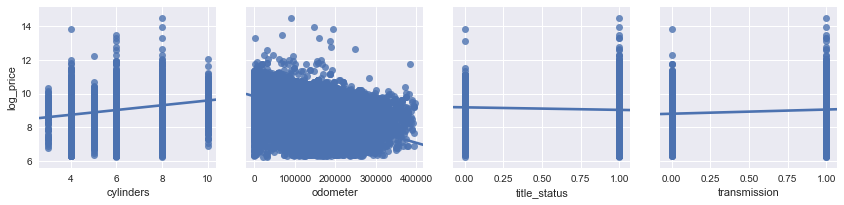

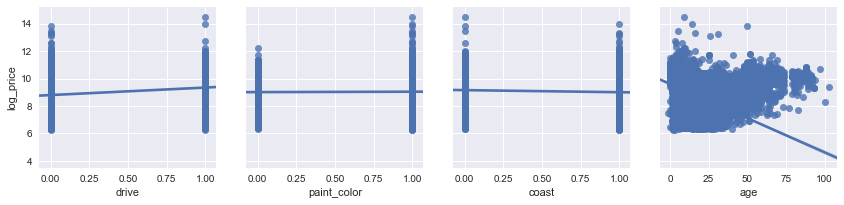

In [44]:
for i in row_groups:
    eda = sns.pairplot(data=df, y_vars=['log_price'], x_vars=i, kind='reg', height =3)

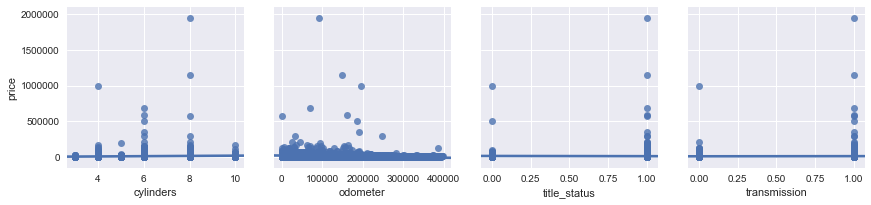

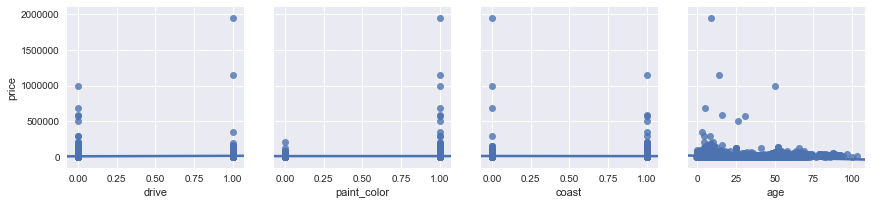

In [45]:
for i in row_groups:
    eda = sns.pairplot(data=df, y_vars=['price'], x_vars=i, kind='reg', height =3)

In [61]:
dummies_df = pd.get_dummies(df, columns = ['manufacturer', 'condition', 'cylinders', 'fuel', 'size', 'type'], drop_first = True)

In [63]:
dummies_df.head()

,price,odometer,title_status,transmission,drive,paint_color,coast,log_price,age,manufacturer_euro,manufacturer_usa,condition_ok,condition_poor,cylinders_4.0,cylinders_5.0,cylinders_6.0,cylinders_8.0,cylinders_10.0,fuel_gas,fuel_other,size_full-size,size_mid-size,size_sub-compact,type_suv,type_truck,type_van
0,17899.0,63500.0,1,0.0,1.0,1.0,0,9.792500,8.0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
1,4600.0,110982.0,1,1.0,0.0,1.0,0,8.433812,12.0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0
2,28000.0,67348.0,1,1.0,1.0,1.0,0,10.239960,16.0,0,1,1,0,0,0,0,0,1,1,0,1,0,0,0,1,0
3,2500.0,129000.0,1,0.0,0.0,1.0,0,7.824046,16.0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0
4,12000.0,65000.0,1,1.0,0.0,1.0,0,9.392662,5.0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0


In [48]:
dummies_df.drop(columns = ['price', 'log_price'], inplace = True)
dummies_df.head()

,odometer,title_status,transmission,drive,paint_color,coast,age,manufacturer_euro,manufacturer_usa,condition_ok,condition_poor,cylinders_4.0,cylinders_5.0,cylinders_6.0,cylinders_8.0,cylinders_10.0,fuel_gas,fuel_other,size_full-size,size_mid-size,size_sub-compact,type_suv,type_truck,type_van
0,63500.0,1,0.0,1.0,1.0,0,8.0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
1,110982.0,1,1.0,0.0,1.0,0,12.0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0
2,67348.0,1,1.0,1.0,1.0,0,16.0,0,1,1,0,0,0,0,0,1,1,0,1,0,0,0,1,0
3,129000.0,1,0.0,0.0,1.0,0,16.0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0
4,65000.0,1,1.0,0.0,1.0,0,5.0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0


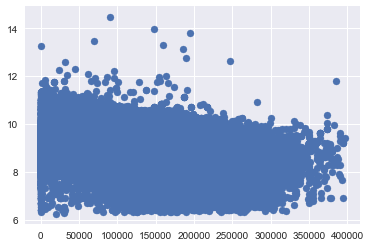

In [49]:
plt.scatter(dummies_df.odometer, df.log_price)

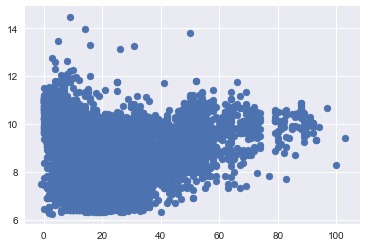

In [50]:
plt.scatter((dummies_df.age), df.log_price)

In [51]:
X = dummies_df
y = df[['log_price']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [52]:
np.exp(y_test).describe()

,log_price
count,19916.000000
mean,11713.924081
std,10005.775578
min,549.000000
25%,4800.000000
50%,8800.000000
75%,15900.000000
max,215420.000000


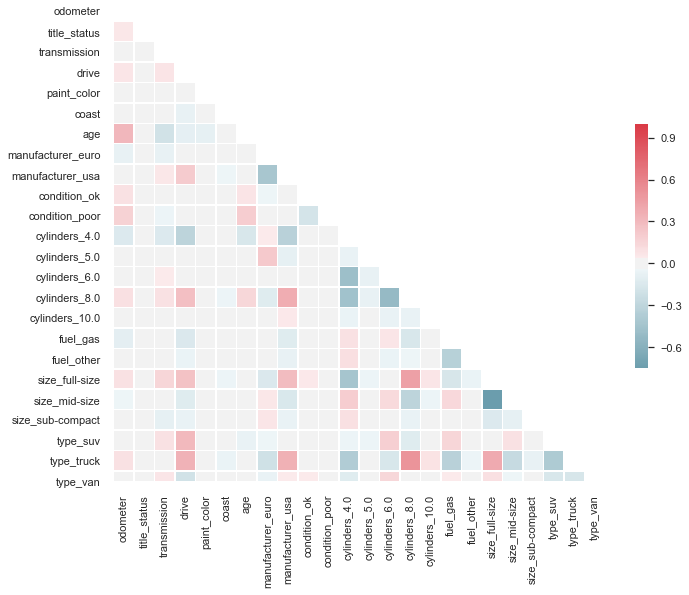

In [53]:
sns.set(style="white")

corr = X_train.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Cross-validation with unscaled, non-poly features

In [54]:
cross_val_linear = -1*cross_val_score(linear_model.LinearRegression(), X_train, y_train.values.ravel(), cv=10, scoring='neg_mean_squared_error')
cross_val_linear

array([0.25646209, 0.26094236, 0.25601712, 0.26131573, 0.26947615,
       0.26714353, 0.26727102, 0.26204729, 0.26462408, 0.24251936])

In [56]:
cross_val_linear = np.sqrt(-1*cross_val_score(linear_model.LinearRegression(), X_train, y_train.values.ravel(), cv=10, scoring='neg_mean_squared_error')).mean()
cross_val_ridge = np.sqrt(-1*cross_val_score(linear_model.Ridge(), X_train, y_train.values.ravel(), cv=10, scoring='neg_mean_squared_error')).mean()
cross_val_bayes_ridge = np.sqrt(-1*cross_val_score(linear_model.BayesianRidge(), X_train, y_train.values.ravel(), cv=10, scoring='neg_mean_squared_error')).mean()
cross_val_lasso = np.sqrt(-1*cross_val_score(linear_model.Lasso(), X_train, y_train.values.ravel(), cv=10, scoring='neg_mean_squared_error')).mean()
cross_val_treeReg = np.sqrt(-1*cross_val_score(tree.DecisionTreeRegressor(), X_train, y_train.values.ravel(), cv=10, scoring='neg_mean_squared_error')).mean()
#cross_val_forestReg = np.sqrt(-1*cross_val_score(RandomForestRegressor(n_estimators = 100), X_train, y_train.values.ravel(), cv=10, scoring='neg_mean_squared_error')).mean()

train_std_dev = np.exp(y_train).std()[0]

print("cross_val rmse linear: {}".format(cross_val_linear))
print("cross_val rmse ridge: {}".format(cross_val_ridge))
print("cross_val rmse bayes_ridge: {}".format(cross_val_bayes_ridge))
print("cross_val rmse lasso: {}".format(cross_val_lasso))
print("cross_val rmse treeReg: {}".format(cross_val_treeReg))
#print("cross_val rmse forestReg: {}".format(cross_val_forestReg))
print(" ")
print("Standard deviation of y_train: {}".format(train_std_dev))
print(" ")
print("cross_val rmse/price_std linear: {}".format(cross_val_linear/train_std_dev))
print("cross_val rmse/price_std ridge: {}".format(cross_val_ridge/train_std_dev))
print("cross_val rmse/price_std bayes_ridge: {}".format(cross_val_bayes_ridge/train_std_dev))
print("cross_val rmse/price_std lasso: {}".format(cross_val_lasso/train_std_dev))
print("cross_val rmse/price_std treeReg: {}".format(cross_val_treeReg/train_std_dev))
#print("cross_val rmse/price_std forestReg: {}".format(cross_val_forestReg/train_std_dev))

cross_val rmse linear: 0.5106155061634852
cross_val rmse ridge: 0.5106158172989781
cross_val rmse bayes_ridge: 0.5106188202765733
cross_val rmse lasso: 0.7013179591381505
cross_val rmse treeReg: 0.485420582826195
 
Standard deviation of y_train: 14026.400859824753
 
cross_val rmse/price_std linear: 3.640388658975378e-05
cross_val rmse/price_std ridge: 3.640390877188703e-05
cross_val rmse/price_std bayes_ridge: 3.640412286655217e-05
cross_val rmse/price_std lasso: 4.999985143351399e-05
cross_val rmse/price_std treeReg: 3.460763653322966e-05


### Scale X_train, X_test, prior to creating polynomial features

In [57]:
scaler = StandardScaler()
transformed_train = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(transformed_train, columns = X_train.columns)
transformed_test = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(transformed_test, columns = X_test.columns)

### Cross-validation with scaled, non-polynomial features

In [58]:
cross_val_linear = np.sqrt(-1*cross_val_score(linear_model.LinearRegression(), X_train_scaled, y_train.values.ravel(), cv=10, scoring='neg_mean_squared_error')).mean()
cross_val_ridge = np.sqrt(-1*cross_val_score(linear_model.Ridge(), X_train_scaled, y_train.values.ravel(), cv=10, scoring='neg_mean_squared_error')).mean()
cross_val_bayes_ridge = np.sqrt(-1*cross_val_score(linear_model.BayesianRidge(), X_train_scaled, y_train.values.ravel(), cv=10, scoring='neg_mean_squared_error')).mean()
cross_val_lasso = np.sqrt(-1*cross_val_score(linear_model.Lasso(), X_train_scaled, y_train.values.ravel(), cv=10, scoring='neg_mean_squared_error')).mean()
cross_val_treeReg = np.sqrt(-1*cross_val_score(tree.DecisionTreeRegressor(), X_train_scaled, y_train.values.ravel(), cv=10, scoring='neg_mean_squared_error')).mean()
#cross_val_forestReg = np.sqrt(-1*cross_val_score(RandomForestRegressor(n_estimators = 100), X_train_scaled, y_train.values.ravel(), cv=10, scoring='neg_mean_squared_error')).mean()

train_std_dev = np.exp(y_train).std()[0]

print("cross_val rmse linear: {}".format(cross_val_linear))
print("cross_val rmse ridge: {}".format(cross_val_ridge))
print("cross_val rmse bayes_ridge: {}".format(cross_val_bayes_ridge))
print("cross_val rmse lasso: {}".format(cross_val_lasso))
print("cross_val rmse treeReg: {}".format(cross_val_treeReg))
#print("cross_val rmse forestReg: {}".format(cross_val_forestReg))
print(" ")
print("Standard deviation of y_train: {}".format(train_std_dev))
print(" ")
print("cross_val rmse/price_std linear: {}".format(cross_val_linear/train_std_dev))
print("cross_val rmse/price_std ridge: {}".format(cross_val_ridge/train_std_dev))
print("cross_val rmse/price_std bayes_ridge: {}".format(cross_val_bayes_ridge/train_std_dev))
print("cross_val rmse/price_std lasso: {}".format(cross_val_lasso/train_std_dev))
print("cross_val rmse/price_std treeReg: {}".format(cross_val_treeReg/train_std_dev))
#print("cross_val rmse/price_std forestReg: {}".format(cross_val_forestReg/train_std_dev))

cross_val rmse linear: 0.510615506163485
cross_val rmse ridge: 0.5106154476666315
cross_val rmse bayes_ridge: 0.5106172785278162
cross_val rmse lasso: 0.8484741024086663
cross_val rmse treeReg: 0.48598919259942913
 
Standard deviation of y_train: 14026.400859824753
 
cross_val rmse/price_std linear: 3.640388658975376e-05
cross_val rmse/price_std ridge: 3.6403882419271676e-05
cross_val rmse/price_std bayes_ridge: 3.640401294892095e-05
cross_val rmse/price_std lasso: 6.0491220156049865e-05
cross_val rmse/price_std treeReg: 3.4648175070443634e-05


### Create polynomial features for X_train

In [60]:
poly_2 = PolynomialFeatures(degree=2, interaction_only=False)
X_train_poly = pd.DataFrame(poly_2.fit_transform(X_train), columns=poly_2.get_feature_names(X_train.columns))
X_test_poly = pd.DataFrame(poly_2.transform(X_test), columns=poly_2.get_feature_names(X_test.columns))
#X_test_poly.head()

### Cross-validation with unscaled, polynomial features

In [61]:
cross_val_linear = np.sqrt(-1*cross_val_score(linear_model.LinearRegression(), X_train_poly, y_train.values.ravel(), cv=10, scoring='neg_mean_squared_error')).mean()
cross_val_ridge = np.sqrt(-1*cross_val_score(linear_model.Ridge(), X_train_poly, y_train.values.ravel(), cv=10, scoring='neg_mean_squared_error')).mean()
cross_val_bayes_ridge = np.sqrt(-1*cross_val_score(linear_model.BayesianRidge(), X_train_poly, y_train.values.ravel(), cv=10, scoring='neg_mean_squared_error')).mean()
cross_val_lasso = np.sqrt(-1*cross_val_score(linear_model.Lasso(), X_train_poly, y_train.values.ravel(), cv=10, scoring='neg_mean_squared_error')).mean()
cross_val_treeReg = np.sqrt(-1*cross_val_score(tree.DecisionTreeRegressor(), X_train_poly, y_train.values.ravel(), cv=10, scoring='neg_mean_squared_error')).mean()
#cross_val_forestReg = np.sqrt(-1*cross_val_score(RandomForestRegressor(n_estimators = 100), X_train_poly, y_train.values.ravel(), cv=10, scoring='neg_mean_squared_error')).mean()

train_std_dev = np.exp(y_train).std()[0]

print("cross_val rmse linear: {}".format(cross_val_linear))
print("cross_val rmse ridge: {}".format(cross_val_ridge))
print("cross_val rmse bayes_ridge: {}".format(cross_val_bayes_ridge))
print("cross_val rmse lasso: {}".format(cross_val_lasso))
print("cross_val rmse treeReg: {}".format(cross_val_treeReg))
#print("cross_val rmse forestReg: {}".format(cross_val_forestReg))
print(" ")
print("Standard deviation of y_train: {}".format(train_std_dev))
print(" ")
print("cross_val rmse/price_std linear: {}".format(cross_val_linear/train_std_dev))
print("cross_val rmse/price_std ridge: {}".format(cross_val_ridge/train_std_dev))
print("cross_val rmse/price_std bayes_ridge: {}".format(cross_val_bayes_ridge/train_std_dev))
print("cross_val rmse/price_std lasso: {}".format(cross_val_lasso/train_std_dev))
print("cross_val rmse/price_std treeReg: {}".format(cross_val_treeReg/train_std_dev))
#print("cross_val rmse/price_std forestReg: {}".format(cross_val_forestReg/train_std_dev))

/Users/sullivanmyer/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.82217e-26): result may not be accurate.
  overwrite_a=True).T
/Users/sullivanmyer/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.08256e-26): result may not be accurate.
  overwrite_a=True).T
/Users/sullivanmyer/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.86033e-26): result may not be accurate.
  overwrite_a=True).T
/Users/sullivanmyer/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.1059e-26): result may not be accurate.
  overwrite_a=True).T
/Users/sullivanmyer/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:147: LinAl

cross_val rmse linear: 0.42110380086364285
cross_val rmse ridge: 0.4210702439422852
cross_val rmse bayes_ridge: 0.4211833229290055
cross_val rmse lasso: 0.5384719978626935
cross_val rmse treeReg: 0.48928622486360085
 
Standard deviation of y_train: 14026.400859824753
 
cross_val rmse/price_std linear: 3.002222773126307e-05
cross_val rmse/price_std ridge: 3.0019835319860243e-05
cross_val rmse/price_std bayes_ridge: 3.0027897187466222e-05
cross_val rmse/price_std lasso: 3.83898908382846e-05
cross_val rmse/price_std treeReg: 3.4883234106408824e-05


### Scale X_train, X_test, after creating polynomial features

In [ ]:
poly_scaler = StandardScaler()
transformed_poly_train = poly_scaler.fit_transform(X_train_poly)
X_train_poly_scaled = pd.DataFrame(transformed_poly_train, columns = X_train_poly.columns)
transformed_poly_test = poly_scaler.transform(X_test_poly)
X_test_poly_scaled = pd.DataFrame(transformed_poly_test, columns = X_test_poly.columns)

In [ ]:
cross_val_linear = np.sqrt(-1*cross_val_score(linear_model.LinearRegression(), X_train_poly_scaled, y_train.values.ravel(), cv=10, scoring='neg_mean_squared_error')).mean()
cross_val_ridge = np.sqrt(-1*cross_val_score(linear_model.Ridge(), X_train_poly_scaled, y_train.values.ravel(), cv=10, scoring='neg_mean_squared_error')).mean()
cross_val_bayes_ridge = np.sqrt(-1*cross_val_score(linear_model.BayesianRidge(), X_train_poly_scaled, y_train.values.ravel(), cv=10, scoring='neg_mean_squared_error')).mean()
cross_val_lasso = np.sqrt(-1*cross_val_score(linear_model.Lasso(), X_train_poly_scaled, y_train.values.ravel(), cv=10, scoring='neg_mean_squared_error')).mean()
cross_val_treeReg = np.sqrt(-1*cross_val_score(tree.DecisionTreeRegressor(), X_train_poly_scaled, y_train.values.ravel(), cv=10, scoring='neg_mean_squared_error')).mean()
#cross_val_forestReg = np.sqrt(-1*cross_val_score(RandomForestRegressor(n_estimators = 100), X_train_poly_scaled, y_train.values.ravel(), cv=10, scoring='neg_mean_squared_error')).mean()

train_std_dev = np.exp(y_train).std()[0]

print("cross_val rmse linear: {}".format(cross_val_linear))
print("cross_val rmse ridge: {}".format(cross_val_ridge))
print("cross_val rmse bayes_ridge: {}".format(cross_val_bayes_ridge))
print("cross_val rmse lasso: {}".format(cross_val_lasso))
print("cross_val rmse treeReg: {}".format(cross_val_treeReg))
#print("cross_val rmse forestReg: {}".format(cross_val_forestReg))
print(" ")
print("Standard deviation of y_train: {}".format(train_std_dev))
print(" ")
print("cross_val rmse/price_std linear: {}".format(cross_val_linear/train_std_dev))
print("cross_val rmse/price_std ridge: {}".format(cross_val_ridge/train_std_dev))
print("cross_val rmse/price_std bayes_ridge: {}".format(cross_val_bayes_ridge/train_std_dev))
print("cross_val rmse/price_std lasso: {}".format(cross_val_lasso/train_std_dev))
print("cross_val rmse/price_std treeReg: {}".format(cross_val_treeReg/train_std_dev))
#print("cross_val rmse/price_std forestReg: {}".format(cross_val_forestReg/train_std_dev))

In [ ]:
alpha_range = np.arange(0.01, 20.0, 0.01)

In [ ]:
param_grid = dict(alpha=alpha_range)
ridge = Ridge()
ridge_grid = GridSearchCV(ridge, param_grid, cv=10, scoring='neg_mean_squared_error', return_train_score=False, n_jobs = -1)
ridge_grid.fit(X_train_poly, y_train)
print(np.sqrt(-1*ridge_grid.best_score_))
print(ridge_grid.best_params_)
print(ridge_grid.best_estimator_)

In [ ]:
param_grid = dict(alpha=alpha_range)
lasso = Lasso()
lasso_grid = GridSearchCV(lasso, param_grid, cv=10, scoring='neg_mean_squared_error', return_train_score=False, n_jobs = -1)
lasso_grid.fit(X_train_poly, y_train)
print(np.sqrt(-1*lasso_grid.best_score_))
print(lasso_grid.best_params_)
print(lasso_grid.best_estimator_)

In [ ]:
param_grid = dict(alpha=alpha_range)
bayes_ridge = BayesianRidge()
bayes_ridge_grid = GridSearchCV(bayes_ridge, param_grid, cv=10, scoring='neg_mean_squared_error', return_train_score=False)
bayes_ridge_grid.fit(X_train, y_train)
#bayes_ridge_df = pd.DataFrame(bayes_ridge_grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]
print(bayes_ridge_grid.best_score_)
print(bayes_ridge_grid.best_params_)
print(bayes_ridge_grid.best_estimator_)

### ridge predictions

In [ ]:
ridge = Ridge(alpha = 0.3)
ridge.fit(X_train_poly, y_train)
y_pred_ridge = ridge.predict(X_test_poly)
actual_price = np.exp(y_test['log_price'].reset_index().drop(columns = ['index'])).to_numpy()
y_test_std = np.exp(y_test).std()[0]
ridge_test_array = np.exp(y_pred_ridge)
ridge_diffs = ridge_test_array - actual_price
ridge_squared_diffs = (ridge_diffs**2)
ridge_diffs_over_n = (sum(ridge_squared_diffs)/len(y_test))[0]
ridge_rmse = np.sqrt(ridge_diffs_over_n)
ridge_standardized_rmse = ridge_rmse/y_test_std
print("ridge rmse: {}".format(ridge_rmse))
print("ridge rmse standardized: {}".format(ridge_standardized_rmse))

### lasso predictions

In [ ]:
lasso = Lasso(alpha = 0.01)
lasso.fit(X_train_poly, y_train)
y_pred_lasso = lasso.predict(X_test_poly)
y_test_array = np.exp(y_pred_lasso)
diffs = y_test_array - actual_price
squared_diffs = (diffs**2)
diffs_over_n = (sum(squared_diffs)/len(y_test))[0]
lasso_rmse = np.sqrt(diffs_over_n)
lasso_standardized_rmse = lasso_rmse/y_test_std
print("lasso rmse: {}".format(lasso_rmse))
print("lasso rmse standardized: {}".format(lasso_standardized_rmse))